In [1]:
%cd ~/ChestXray-14/

/home/jovyan/ChestXray-14


In [2]:
"""
Chonsawat Path: input_path = "/content/drive/MyDrive/KKU /Project/Dataset/ChestXray NIH"
Deepnote Path: input_path = "/datasets/chonsawat-drive/KKU /Project/Dataset/ChestXray NIH"
Elab Path: input_path = "~/ChestXray-14/dataset/ChestXray NIH"
"""
input_path = "dataset/ChestXray NIH"

import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [3]:
# global STRATEGY, BATCH_SIZE, IMG_SIZE, SEED
STRATEGY = tf.distribute.get_strategy()    
BATCH_SIZE = 16
IMG_SIZE = 224
SEED = 42
    
print('Using tensorflow %s' % tf.__version__)

Using tensorflow 2.6.2


---
#### ===== Prepare Data =====

In [4]:
# Function จากโฟลเดอร์ modules ที่ใช้อ่านข้อมูลพอดีมันยาวและขี้เกียจ Copy/Paste เลยแบ่งเป็น .py ไว้ใช้
from modules.get_data_function import *

In [5]:
train_filenames = tf.io.gfile.glob(f'{input_path}/data/224x224/train/*.tfrec')
val_filenames = tf.io.gfile.glob(f'{input_path}/data/224x224/valid/*.tfrec')
test_filenames = tf.io.gfile.glob(f'{input_path}/data/224x224/test/*.tfrec')

In [6]:
dataset = get_dataset(train_filenames[0], shuffled=True, repeated=True, augmented=True).take(1)

2022-04-15 13:47:10.527145: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-15 13:47:11.297483: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 8003 MB memory:  -> device: 0, name: NVIDIA A100-SXM4-40GB MIG 2g.10gb, pci bus id: 0000:ca:00.0, compute capability: 8.0


In [7]:
dataset = list(dataset.as_numpy_iterator())[0]
print(len(dataset))

dataset = dataset[0]
print(len(dataset))

2022-04-15 13:47:11.728657: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


2
16


In [8]:
dataset[0].shape

(224, 224, 1)

---
#### ===== Read and Show =====
ทดลางอ่านจากไฟล์

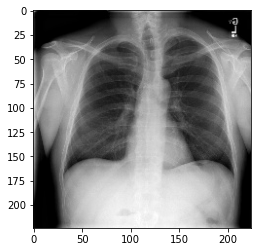

In [11]:
import matplotlib.pyplot as plt

plt.imshow(dataset[1], cmap='binary_r');

---
#### ===== Read and Show =====
ทดลองอ่านจาก Path

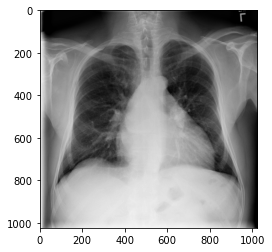

In [10]:
img_path = "dataset/ChestXray NIH/images_001/images/00000001_000.png"

plt.imshow(plt.imread(img_path), cmap='binary_r');